# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 1: Samuele Voltan's notebook.</span>

In [1]:
# Common libs
from matplotlib import pyplot as plt
import numpy as np

### <span style="color:red"> Exercise 01.1
Make a picture of the estimation of $\langle r \rangle$
\begin{equation}\langle r \rangle = \int_0^1 \text{d}r\,r = 1/2\end{equation}
and of $\sigma^2$ 
\begin{equation}\sigma^2 = \int_0^1 \text{d}r\,(r-1/2)^2 = 1/12 = -\sum_{n=0}^\infty n
\end{equation}
and their uncertainties (which corresponds to Standard Deviation of the mean) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$. Then, divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test.

### <span style="color:orange">Solution
I divided the estimation in <code>N_blocks = 100</code> blocks of <code>N_throws = 10000</code> throws each, therefore having a total number of throws of $10^6$. The following lines define those numbers throughout the notebook.

In [3]:
N_blocks = 100     # Number of blocks
N_throws = 10000   # Number of throws per block
x = np.arange(N_blocks) * N_throws

The following lines produce a picture of the estimation of $\langle r \rangle$. The data analysis has been carried out in <code>lab1/ex01.1/main.cpp</code> using the block method. Note that I load three different files for the three different tasks in this Exercise 01.1. Of course, it could be argued that a single file with more columns is sufficient. Indeed, it is, but I found myself more comfortable having distinct files during debugging. *Divide et impera!*

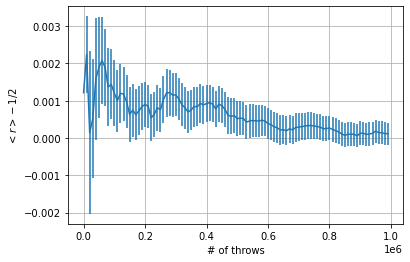

In [9]:
data = np.loadtxt("data/ex01.1.1.out")
plt.errorbar(x,data[:,0]-0.5,yerr=data[:,1])
plt.xlabel(r"# of throws")
plt.ylabel(r"$<r>-1/2$")
plt.grid(True)
plt.show()

I now show the picture of the estimation of $\sigma^2$, obtained with the exact same method as $\langle r\rangle$.

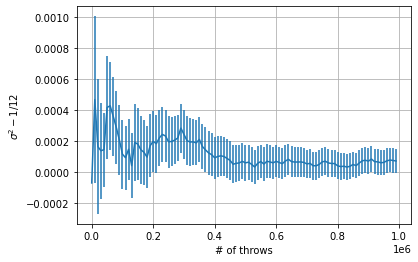

In [12]:
data = np.loadtxt("data/ex01.1.2.out")
#plt.figure(figsize=(14,7))
plt.errorbar(x,data[:,0]-1/12,yerr=data[:,1])
plt.xlabel(r"# of throws")
plt.ylabel(r"$\sigma^2-1/12$")
plt.grid(True)
plt.show()

The last task is to perform a $\chi^2$ test. We should expect $\chi^2\sim 100$: indeed, we get a range $\chi^2\in[75.46
,\,137.16]$. We can fully appreciate the $\chi^2$ test for our generator of random numbers by plotting a histogram: here we see that there is a peak in the neighborhood of the expected value of $\chi^2=100$.

(array([ 6., 14., 19., 17., 15.,  8.,  9.,  7.,  2.,  3.]),
 array([ 75.46,  81.63,  87.8 ,  93.97, 100.14, 106.31, 112.48, 118.65,
        124.82, 130.99, 137.16]),
 <BarContainer object of 10 artists>)

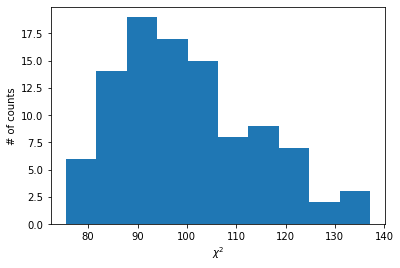

In [11]:
data = np.loadtxt("data/ex01.1.3.out")
plt.xlabel(r"$\chi^2$")
plt.ylabel(r"# of counts")
plt.hist(data)

### <span style="color:red"> Exercise 01.2
Add two probability distributions by using the method of the inversion of the cumulative distribution to sample from a generic exponential distribution
\begin{equation}p(x) = \lambda \exp(-\lambda x),\end{equation}
$x\in [0;+\infty]$, and a generic Cauchy-Lorentz distribution
\begin{equation} p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2},\end{equation}
$x\in [-\infty;+\infty]$. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of
    \begin{equation}S_N = \frac{1}{N}\sum_{i=1}^N x_i\end{equation}
for $N=1, 2, 10, 100$, being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

### <span style="color:orange"> Solution

#### Picture 1: Standard dice.
The simulation consists in launching a dice, that is, sampling an integer in $[0,6]$ and then performing the sum $S_N$.

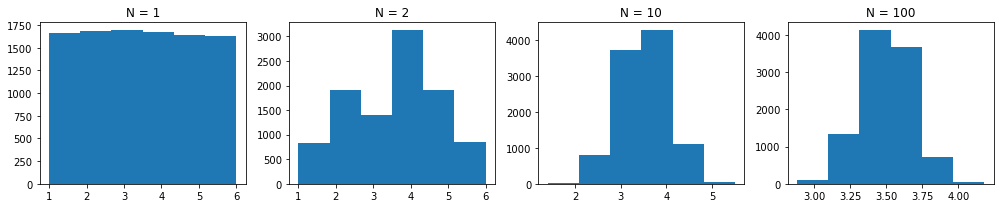

In [14]:
data = np.loadtxt("data/ex01.2.1.out")

plt.figure(figsize=(14,3))

plt.subplot(1, 4, 1)
plt.title("N = 1")
plt.hist(data[:,0], bins=6)
plt.subplot(1, 4, 2)
plt.title("N = 2")
plt.hist(data[:,1], bins=6)
plt.subplot(1, 4, 3)
plt.title("N = 10")
plt.hist(data[:,2], bins=6)
plt.subplot(1, 4, 4)
plt.title("N = 100")
plt.hist(data[:,3], bins=6)
plt.tight_layout()
plt.plot();

#### Picture 2: Exponential dice.
The simulation consists in sampling a random number in $[0,+\infty)$ with the inverse cumulative of an exponential distribution. The term *dice* is rather misleading, since now the $x_i$ in the sum $S_N$ need not be integers in $[0,6]$.

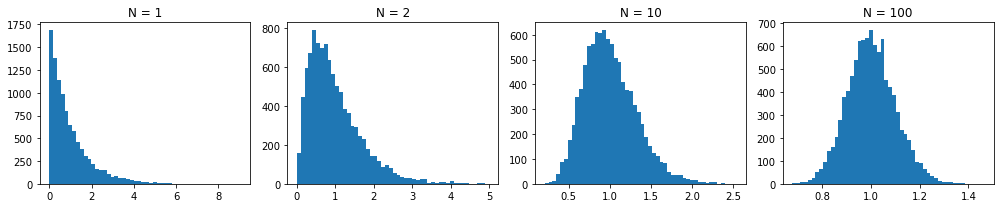

In [19]:
data = np.loadtxt("data/ex01.2.2.out")

plt.figure(figsize=(14,3))

plt.subplot(1, 4, 1)
plt.title("N = 1")
plt.hist(data[:,0], bins=50)
plt.subplot(1, 4, 2)
plt.title("N = 2")
plt.hist(data[:,1], bins=50)
plt.subplot(1, 4, 3)
plt.title("N = 10")
plt.hist(data[:,2], bins=50)
plt.subplot(1, 4, 4)
plt.title("N = 100")
plt.hist(data[:,3], bins=50)
plt.tight_layout()
plt.plot();

#### Picture 3: Lorentzian dice.
The simulation consists in sampling a random number in $(-\infty,+\infty)$ with the inverse cumulative of a Cauchy-Lorentz distribution. <span style="color:red">Note that, no matter what value takes $N$, the sum $S_N$ is distributed as a Lorentzian as well. CONTROLLARE

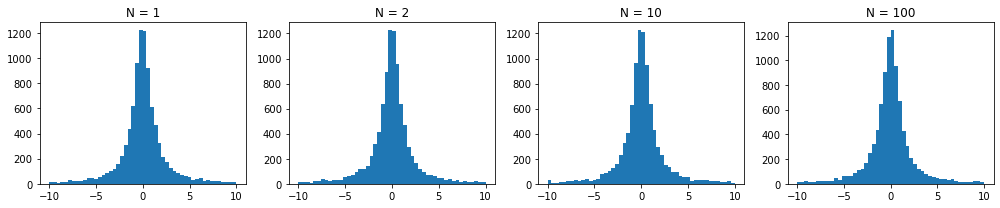

In [18]:
data = np.loadtxt("data/ex01.2.3.out")

plt.figure(figsize=(14,3))

plt.subplot(1, 4, 1)
plt.title("N = 1")
plt.hist(data[:,0],range=[-10, 10], bins=50)
plt.subplot(1, 4, 2)
plt.title("N = 2")
plt.hist(data[:,1],range=[-10, 10], bins=50)
plt.subplot(1, 4, 3)
plt.title("N = 10")
plt.hist(data[:,2],range=[-10, 10], bins=50)
plt.subplot(1, 4, 4)
plt.title("N = 100")
plt.hist(data[:,3],range=[-10, 10], bins=50)
plt.tight_layout()
plt.plot();

### <span style="color:red">Exercise 01.3
Simulate the Buffon’s experiment. Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$. If possible, do not use $\pi$ to evaluate $\pi$.

### <span style="color:orange"> Solution
I proceed as follows: first, generate a random number $x_1\in[0,d]$ for the $x$ coordinate of the first endpoint of the needle, $d$ being the distance of the straight lines that rule the horizontal plane. In order to generate a random angle $\theta\in[0,2\pi)$, I generate two numbers $x,y\in[0,1]$ such that $x^2+y^2\le 1$ and then I state that the angle is
    $$\theta =\begin{cases}
    \arccos\frac{x}{\sqrt{x^2+y^2}}\quad\text{ if } y\ge 0\\
    2\pi - \arccos\frac{x}{\sqrt{x^2+y^2}}\quad\text{ otherwise.}
    \end{cases}$$
Then, if the $x$ coordinate of the second endpoint of the needle $x_2=x_1+\ell\sin\theta$ is negative or greater than $d$, it means that the needle has intersected a line and a counter $N_\text{hit}$ must be incremented. The estimation of $\pi$ is then
    $$\pi = \lim_{M \to \infty}\frac{2\ell M}{N_\text{hit}d}.$$
I used the values $d=1$ and $\ell=0.7$.

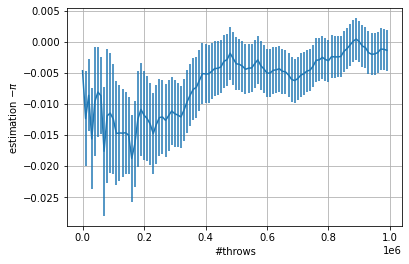

In [23]:
data = np.loadtxt("data/ex01.3.1.out")
plt.errorbar(x, data[:,0]-np.pi, yerr=data[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"estimation $-\pi$")
plt.grid(True)
plt.show()